# LABELS AND LEGENDS 

In [1]:
library("lattice")
data(Cars93, package = "MASS")
table(Cars93$Cylinders)
sup.sym <- Rows(trellis.par.get("superpose.symbol"), 1:5)
str(sup.sym)


     3      4      5      6      8 rotary 
     3     49      2     31      7      1 

List of 6
 $ alpha: num [1:5] 1 1 1 1 1
 $ cex  : num [1:5] 0.8 0.8 0.8 0.8 0.8
 $ col  : chr [1:5] "#0080ff" "#ff00ff" "darkgreen" "#ff0000" ...
 $ fill : chr [1:5] "#CCFFFF" "#FFCCFF" "#CCFFCC" "#FFE5CC" ...
 $ font : num [1:5] 1 1 1 1 1
 $ pch  : num [1:5] 1 1 1 1 1


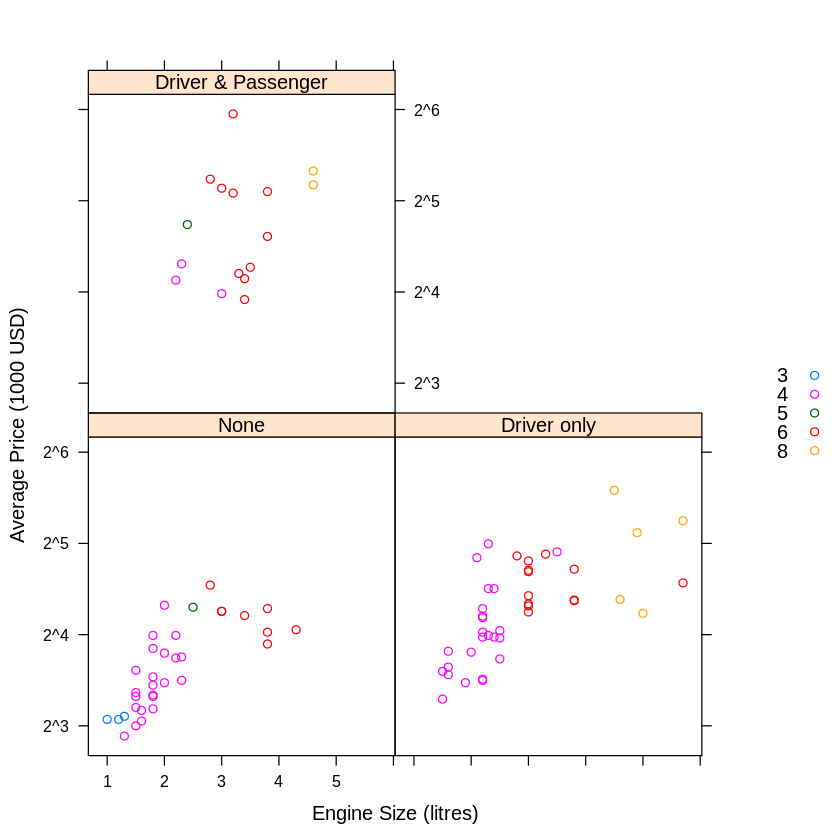

In [2]:
## Average Price of Cars versus Engine Size
xyplot(Price ~ EngineSize | reorder(AirBags, Price), data = Cars93, 
       groups = Cylinders, subset = Cylinders != "rotary", 
       scales = list(y = list(log = 2, tick.number = 3)), 
       xlab = "Engine Size (litres)", 
       ylab = "Average Price (1000 USD)",
       key = list(text = list(levels(Cars93$Cylinders)[1:5]), 
                  points = sup.sym, space = "right"))

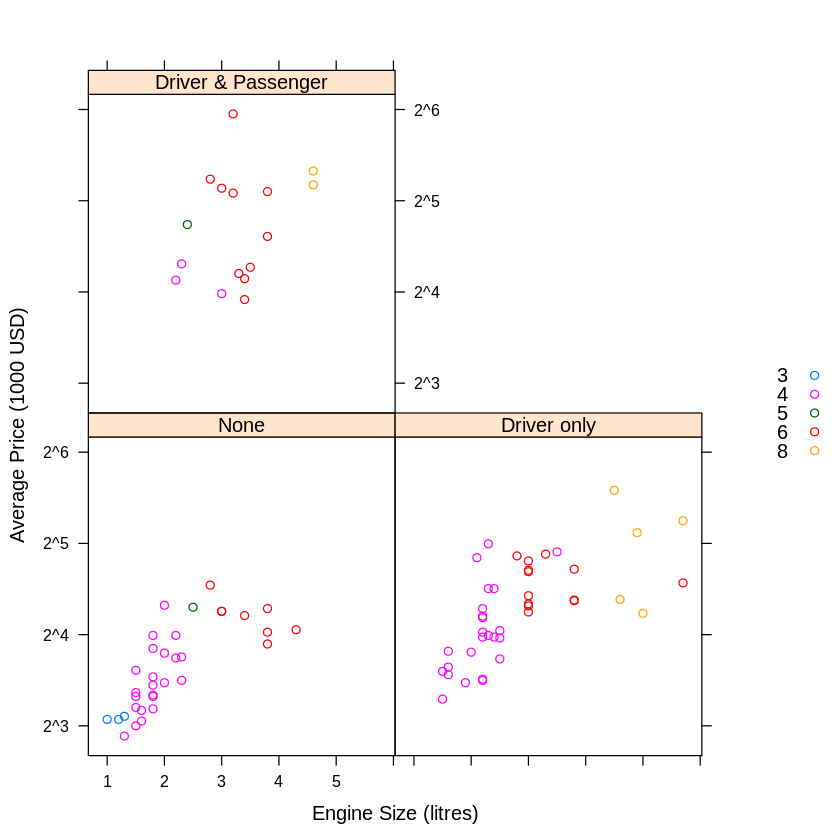

In [3]:
## (alternative, using auto.key)
xyplot(Price ~ EngineSize | reorder(AirBags, Price), data = Cars93, 
       groups = Cylinders, subset = Cylinders != "rotary", 
       scales = list(y = list(log = 2, tick.number = 3)), 
       xlab = "Engine Size (litres)", 
       ylab = "Average Price (1000 USD)",
       auto.key = list(text = levels(Cars93$Cylinders)[1:5], 
                       space = "right", points = TRUE))

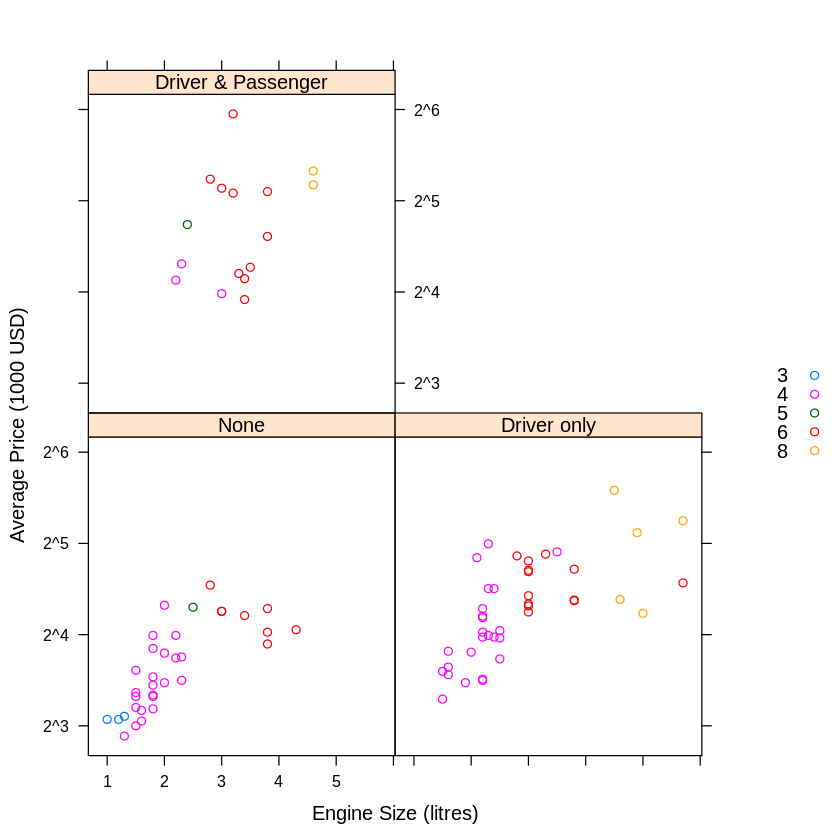

In [4]:
## (yet another alternative, using drop=TRUE)
xyplot(Price ~ EngineSize | reorder(AirBags, Price),
       data = subset(Cars93, Cylinders != "rotary"),
       groups = Cylinders[, drop = TRUE],
       scales = list(y = list(log = 2, tick.number = 3)),
       xlab = "Engine Size (litres)",
       ylab = "Average Price (1000 USD)",
       auto.key = list(space = "right"))

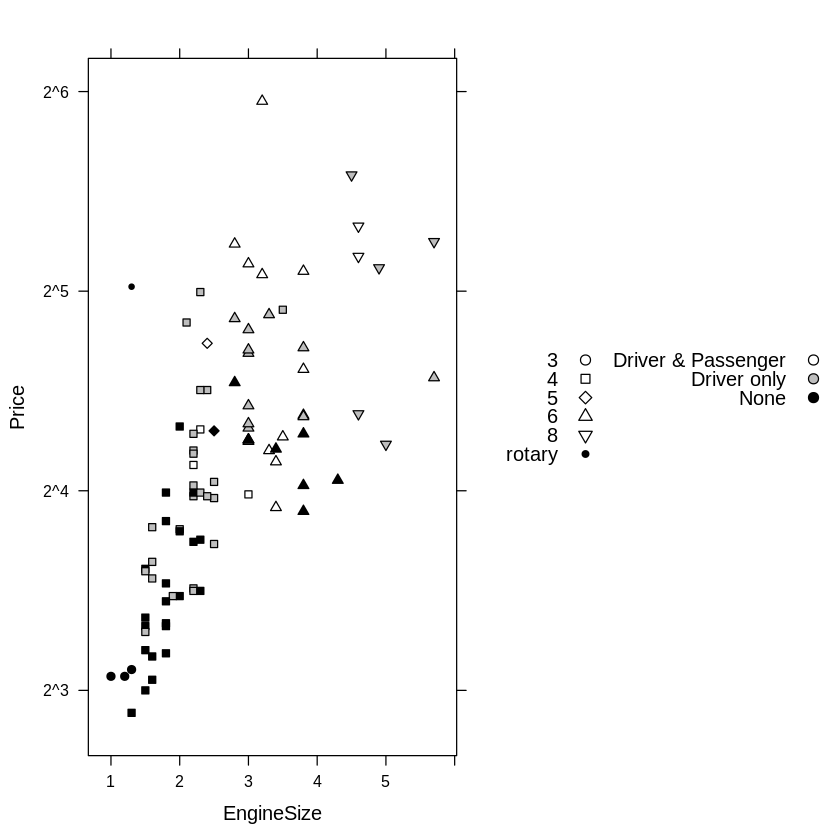

In [5]:
my.pch <- c(21:25, 20)
my.fill <- c("transparent", "grey", "black")

## Group with Cylinders and Airbags
with(Cars93, 
     xyplot(Price ~ EngineSize, 
            scales = list(y = list(log = 2, tick.number = 3)),
            panel = function(x, y, ..., subscripts) {
              pch <- my.pch[Cylinders[subscripts]]
              fill <- my.fill[AirBags[subscripts]]
              panel.xyplot(x, y, pch = pch, 
                           fill = fill, col = "black")
            },
            key = list(space = "right", adj = 1,
                       text = list(levels(Cylinders)), 
                       points = list(pch = my.pch), 
                       text = list(levels(AirBags)), 
                       points = list(pch = 21, fill = my.fill),
                       rep = FALSE)))

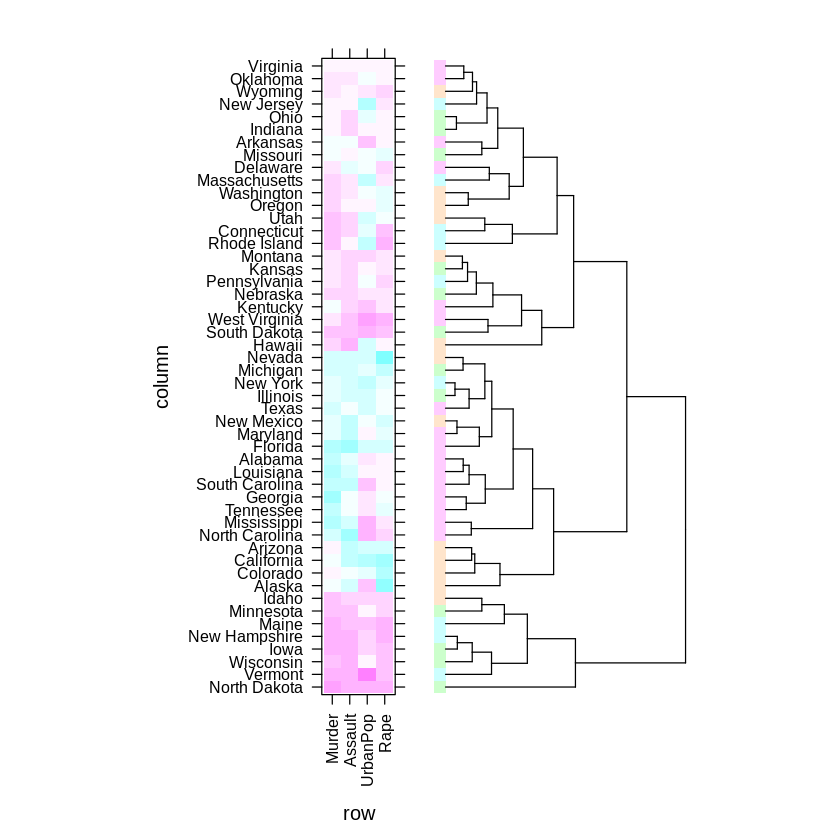

In [6]:
hc1 <- hclust(dist(USArrests, method = "canberra"))
hc1 <- as.dendrogram(hc1)
ord.hc1 <- order.dendrogram(hc1)
hc2 <- reorder(hc1, state.region[ord.hc1])
ord.hc2 <- order.dendrogram(hc2)
library("latticeExtra")
region.colors <- trellis.par.get("superpose.polygon")$col

## Heatmap Created with Levelplot Function
levelplot(t(scale(USArrests))[, ord.hc2], 
          scales = list(x = list(rot = 90)),
          colorkey = FALSE,
          legend =
            list(right =
            list(fun = dendrogramGrob,
                 args =
                   list(x = hc2, ord = ord.hc2,
                        side = "right", size = 10, size.add = 0.5,
                        add = list(rect =
                          list(col = "transparent",
                               fill = region.colors[state.region])),
                        type = "rectangle"))))
